In [2]:
W = 304
H = 240

In [1]:
import math
import numpy as np
import cv2
from glob import glob
from src.visualize import vis_utils as vis
from src.io.psee_loader import PSEELoader
import random
import matplotlib.pyplot as plt

In [3]:
def play_files_parallel(td_files, labels=None, delta_t=50000, skip=0):
    """
    Plays simultaneously files and their boxes in a rectangular format.
    """
    # open the video object for the input files
    videos = [PSEELoader(td_file) for td_file in td_files]
    # use the naming pattern to find the corresponding box file
    box_videos = [PSEELoader(glob(td_file.split('_td.dat')[0] +  '*.npy')[0]) for td_file in td_files]

    height, width = videos[0].get_size()
    labelmap = vis.LABELMAP if height == 240 else vis.LABELMAP_LARGE

    # optionally skip n minutes in all videos
    for v in videos + box_videos:
        v.seek_time(skip)

    # preallocate a grid to display the images
    size_x = int(math.ceil(math.sqrt(len(videos))))
    size_y = int(math.ceil(len(videos) / size_x))
    frame = np.zeros((size_y * height, width * size_x, 3), dtype=np.uint8)

    # cv2.namedWindow('out', cv2.WINDOW_NORMAL)

    # while all videos have something to read
    while not sum([video.done for video in videos]):

        # load events and boxes from all files
        events = [video.load_delta_t(delta_t) for video in videos]
        box_events = [box_video.load_delta_t(delta_t) for box_video in box_videos]
        for index, (evs, boxes) in enumerate(zip(events, box_events)):
            y, x = divmod(index, size_x)
            # put the visualization at the right spot in the grid
            im = frame[y * height:(y + 1) * height, x * width: (x + 1) * width]
            # call the visualization functions
            im = vis.make_binary_histo(evs, img=im, width=width, height=height)

            vis.draw_bboxes(im, boxes, labelmap=labelmap)

        # display the result
        # cv2.imshow('out', frame)
        plt.imshow(frame)
        break
        # cv2.waitKey(0)

In [9]:
file_dataset_files = glob('../dataset/*.dat')
random.seed(42)
random_file = random.choice(file_dataset_files)
random_file_labels = glob(random_file.split('_td.dat')[0] +  '_bbox.npy')[0]

In [10]:
random_file, random_file_labels

('../dataset/17-12-07_10-27-28_305500000_365500000_td.dat',
 '../dataset/17-12-07_10-27-28_305500000_365500000_bbox.npy')

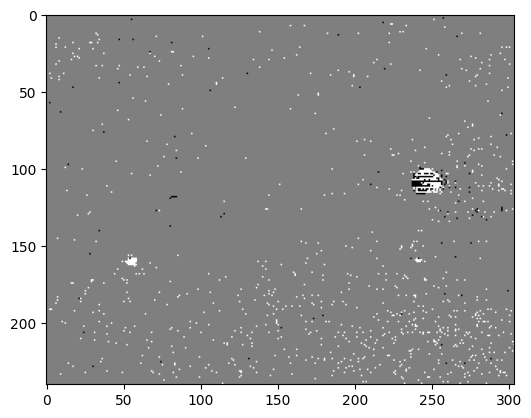

In [18]:
play_files_parallel([random_file], [random_file_labels], delta_t=500000, skip=1)